In [26]:
from __future__ import print_function
import logging

import grpc
import numpy as np
import cv2
import image_pb2
import image_pb2_grpc

def rot_90(img):
    r, buf = cv2.imencode(".png", img)
    with grpc.insecure_channel('localhost:50051') as channel:
        stub = image_pb2_grpc.RotateStub(channel)
        response = stub.rot90(image_pb2.image(png=buf.tobytes()))
    
    return cv2.imdecode(np.frombuffer(response.png,dtype=np.byte),cv2.IMREAD_COLOR)

def raw_rot90(img):
    with grpc.insecure_channel('localhost:50051') as channel:
        stub = image_pb2_grpc.RotateStub(channel)
        req = image_pb2.raw_image()
        req.raw = img.tobytes()
        req.rows = img.shape[0]
        req.cols = img.shape[1]
        response = stub.raw_rot90(req)
    return np.frombuffer(response.raw,dtype=np.uint8).reshape(response.rows, response.cols, 3)

In [27]:
photo = cv2.imread('../photo-1515061942942-2fb5aa4d63c9.jpg')

In [64]:
%timeit 1
rot90 = rot_90(photo)

9.58 ns ± 0.0449 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [60]:
%timeit 100
rot90 = cv2.rotate(photo, cv2.ROTATE_90_CLOCKWISE)

9.63 ns ± 0.0519 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [59]:
%timeit 100
rot90 = raw_rot90(cv2.resize(photo, (int(photo.shape[1]/8*7), int(photo.shape[0]/8*7))))

9.67 ns ± 0.0276 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


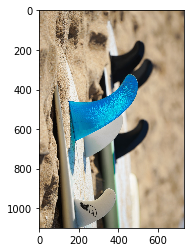

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(rot90,cv2.COLOR_BGR2RGB))

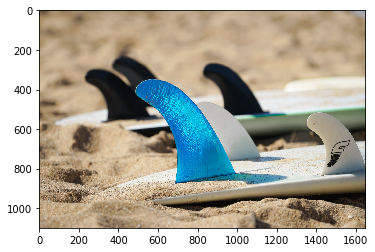

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(photo,cv2.COLOR_BGR2RGB))

Thanks to [@mgolsen](https://unsplash.com/@mganeolsen) for making this [photo](https://unsplash.com/photos/wJZ2Uyljhfo) available freely on [@unsplash](https://unsplash.com)